In [2]:
# import requests Python’un çok popüler HTTP istemci kütüphanesidir.
""" Web sitelerine GET veya POST isteği göndermek,

API’lerden veri çekmek (örneğin JSON verisi almak),

Web sayfalarının HTML içeriğini indirmek için kullanılır. """

import requests
from html.parser import HTMLParser

In [3]:
# https://en.wikipedia.org/wiki/Data_science

url = "https://en.wikipedia.org/wiki/Data_science"
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [4]:
""" Bu sınıfın amacı:

HTML dökümanındaki metinleri alıp,

<script> ve <style> gibi gereksiz alanları atlayarak,

Temiz bir düz yazı olarak res içine toplamaktır.

"""
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

In [5]:
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 Cloud computing for data science 5 Ethical consideration in data science 6 See also 7 References Toggle the table of contents Data science 50 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Ido Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 N

In [7]:
# import nlp_rake: Belirli bir metinden önemli anahtar kelimeleri veya kelime öbeklerini otomatik olarak bulur.
import nlp_rake
import matplotlib.pyplot as plt

In [8]:
# En fazla 2 kelimeden oluşan, metinde en az 3 kez geçen ve 5 karakterden uzun anahtar kelimeleri bulmak için bir RAKE aracı oluştur" anlamına gelir.
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

In [9]:
res = extractor.apply(text)
res


[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('statistical learning', 4.0),
 ('big data', 4.0),
 ('data science', 3.888888888888889),
 ('computer science', 3.888888888888889),
 ('^ davenport', 3.8),
 ('information science', 3.7888888888888888),
 ('cloud computing', 3.75),
 ('data analysis', 3.7),
 ('science', 1.8888888888888888),
 ('analysis', 1.7),
 ('statistics', 1.3076923076923077),
 ('processing', 1.25),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('chikio', 1.0)]

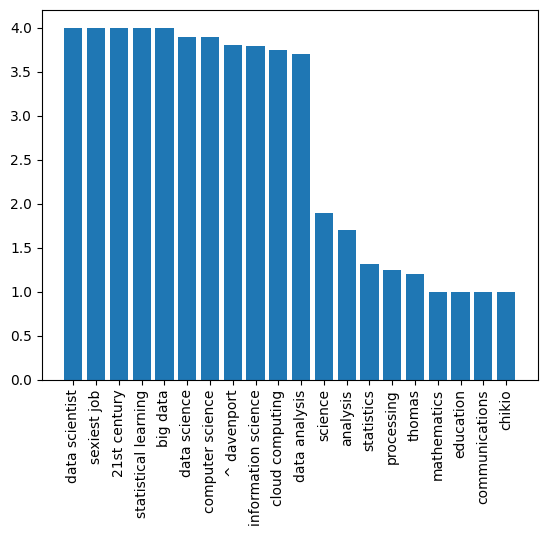

In [10]:
def plot(pair_list):
    pair_list = pair_list[:20]
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [12]:
# WordCloud, bir metindeki en sık geçen kelimeleri görsel bir kelime bulutu (word cloud) olarak göstermeye yarar.
from wordcloud import WordCloud

In [13]:
wc = WordCloud(background_color='white',width=800,height=600)

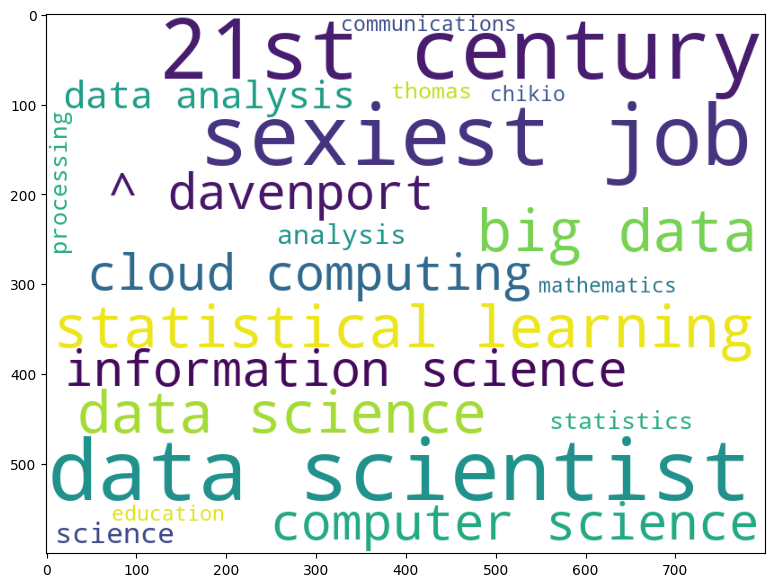

In [14]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))

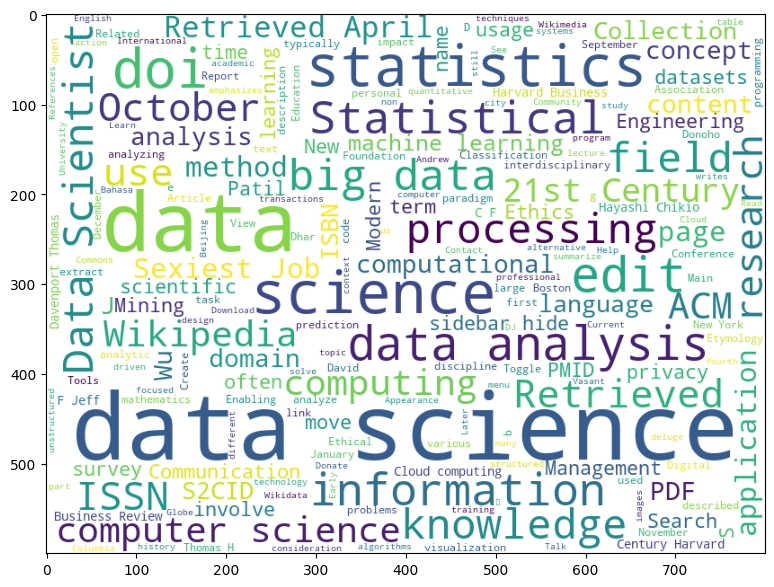

In [15]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))